# Analyzing the WHR census data

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File names of the data set
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")

df = pd.read_csv(WHRDataSet_filename)

#Initial data inspection
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [3]:
df.shape

(1562, 19)

## Choosing data/defining the problem 

I chose the world happiness report dataset, and will be predicting the healthy life expectancy at birth rate label. This will be a a supervised regression learning problem, as the label columns exist. My features may include: log gdp, social support, freedom to make life choices, democatic quality, and confidence in national government. This is an important problem because analyzing the weights of each feature may reveal a correlation between a feature and the label, and may influence companies in terms of legal decisions regarding life choices.

## Understanding the Data

In [4]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [5]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

## Defining the project plan


My new feature list may include all the features except for ones which have less than 1300 data entries for the 1562 examples. This means I not consider several of the GINI indexes. In addition, I will be merging the most recent measurements and averaging their results, so each country is one example. All data types including the label are floats: thus a regression model is best fit. I will also use both a linear and decision tree regressor model to confirm my results, and compare the resulting feature weights. 

## Implementation

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

2024-08-02 22:15:00.431368: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-02 22:15:00.431396: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
# Starting off with cleaning the data - remove unnecessary features then average into one example per country

In [8]:
df = df.dropna()
df = df.drop(columns = ['year','GINI index (World Bank estimate)', 
                        'gini of household income reported in Gallup, by wp5-year'])
df = df.groupby(['country']).mean().reset_index()
df.head()

,country,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-15"
0,Albania,5.510124,9.246649,0.784502,68.028885,0.601512,-0.174559,0.847675,0.606636,0.271393,0.364894,-0.060784,-0.328862,1.921203,0.348668,0.303250
1,Argentina,6.560461,9.842538,0.910681,66.764910,0.735419,-0.145500,0.831287,0.851015,0.240678,0.415697,0.159102,-0.552361,2.063922,0.314797,0.476067
2,Armenia,4.314884,8.903348,0.700926,64.242724,0.489808,-0.194352,0.894473,0.540319,0.436084,0.285284,-0.337158,-0.207510,2.140216,0.496135,0.325067
3,Australia,7.450047,10.630672,0.954520,71.852341,0.932059,0.302014,0.366127,0.834236,0.220073,0.609753,1.154313,1.815898,1.737802,0.233261,0.342750
4,Austria,7.324537,10.697024,0.930444,71.022234,0.912360,0.124661,0.653064,0.798689,0.158092,0.418947,1.345093,1.611550,1.804510,0.246559,0.303818


In [9]:
df.shape

(104, 16)

In [10]:
# Try a simple linear regression model and evaluate results

RMSE: 2.6050027029343985


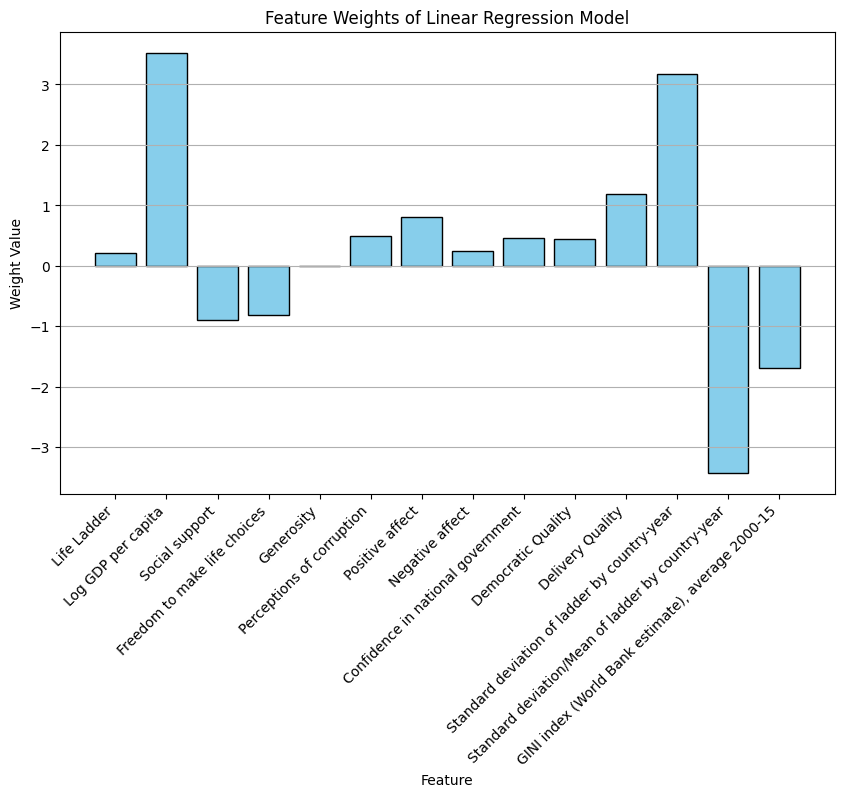

In [11]:
#Initialize model, features, and label datafram columns
X = df.drop(columns = ['Healthy life expectancy at birth','country'])
y = df['Healthy life expectancy at birth']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15)
lreg_model = LinearRegression()

#Scale the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Fit the data
lreg_model.fit(X_train_scaled,y_train)
prediction = lreg_model.predict(X_test_scaled)

#Checking accuracy
lreg_MSE = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE: " + str(lreg_MSE)) #Results in RMSE of 2-5 years off correct value

#Check weights of the model
features = X.columns.tolist()
weights = lreg_model.coef_

#Visualize
plt.figure(figsize=(10, 6))
plt.bar(features, weights, color='skyblue', edgecolor='black')
plt.title('Feature Weights of Linear Regression Model')
plt.xlabel('Feature')
plt.ylabel('Weight Value')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [12]:
# Analysis: Results that align with previous understanding - strange aspects where 
# social support and freedom to make life choices inversely correlated with healthy life expectancy

In [13]:
# Decision Tree Model

RMSE: 3.9490161517510756


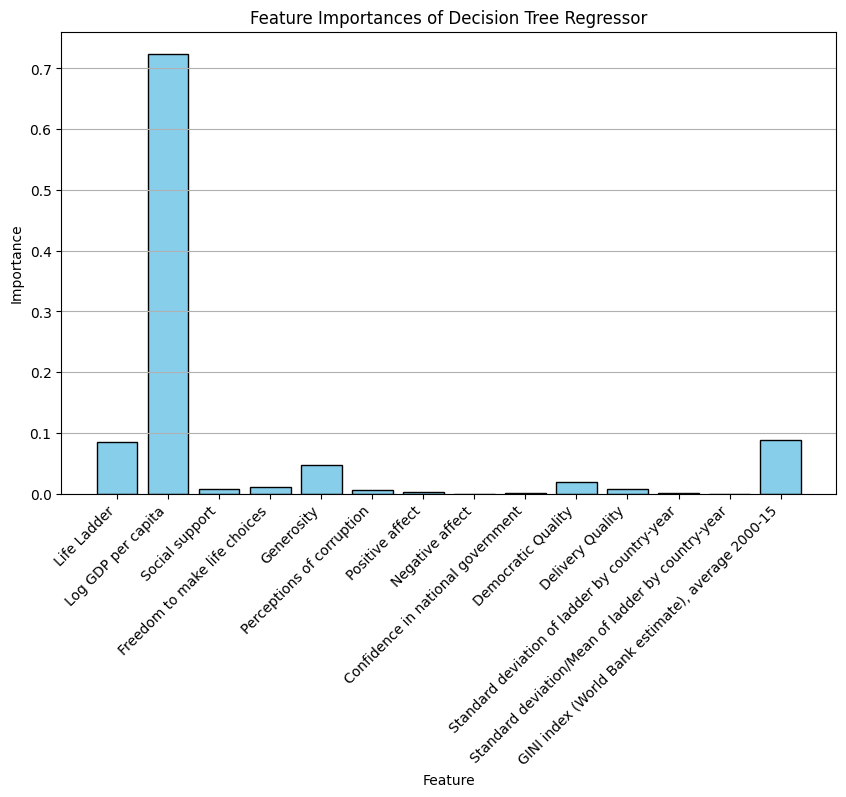

In [14]:
X = df.drop(columns = ['Healthy life expectancy at birth','country'])
y = df['Healthy life expectancy at birth']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
prediction = dt_model.predict(X_test)

#Inspect accuracy:
DT_MSE = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE: " + str(DT_MSE)) 

#Inspect the weights 
importances = dt_model.feature_importances_
features = X.columns.tolist()

plt.figure(figsize=(10, 6))
plt.bar(features,importances, color='skyblue', edgecolor='black')
plt.title('Feature Importances of Decision Tree Regressor')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [15]:
# Analysis: Here, we see that the life ladder (subjectie well-being)
# and log GDP per capita are very important features in determing the 
# healthy life expectancy at birth. This aligns with previous understanding that 
# economic and subjective wellness will directly correlate with health and longevity.